In [7]:
# load the necessary libraries
import logomaker
import pandas as pd
import numpy as np
import joblib  # for loading pre-trained model
from sklearn.decomposition import PCA

from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sequences_df = pd.read_csv("/home/vicky/Downloads/NLSeer/NLSeer/finalized_complete_NLS_sequence_table.csv")

In [3]:
sequences_df.head()

,UniProt ID,Sequence_full,Name,Begin,End,Sequence_nls,Length,Evidence,ECO code
0,Q14738,MPYKLKKEKEPPKVAKCTAKPSSSGKDGGGENTEEAQPQPQPQPQP...,Serine/threonine-protein phosphatase 2A 56 kDa...,548,565,KRTVETEAVQMLKDIKKE,18,Sequence Analysis,ECO:0000255
1,Q13362,MLTCNKAGSRMVVDAANSNGPFQPVVLLHIRDVPPADQEKLFIQKL...,Serine/threonine-protein phosphatase 2A 56 kDa...,416,422,KLKEKLK,7,Sequence Analysis,ECO:0000255
2,Q9NRA8,MDRRSMGETESGDAFLDLKKPPASKCPHRYTKEELLDIKELPHSKQ...,Eukaryotic translation initiation factor 4E tr...,195,211,RREFGDSKRVFGERRRN,17,NaN,NaN
3,P42684,MGQQVGRVGEAPGLQQPQPRGIRGSSAARPSGRRRDPAGRTTETGF...,Abelson tyrosine-protein kinase 2,658,660,KKR,3,Sequence Analysis,ECO:0000255
4,Q4JIM5,MGQQVGRVGEAPGLQQPQPRGIRGSSAARPSGRRRDPAGRTADAGF...,Abelson tyrosine-protein kinase 2,659,661,KKR,3,Sequence Analysis,ECO:0000255


In [4]:
sequences_df.shape

(1363, 9)

In [5]:
print(sequences_df[["Sequence_full"]].iloc[1])


Sequence_full    MLTCNKAGSRMVVDAANSNGPFQPVVLLHIRDVPPADQEKLFIQKL...
Name: 1, dtype: object


In [8]:
def create_pssm(aligned_sequences):
    # Initialize a dictionary to hold counts for each amino acid at each position.
    position_counts = defaultdict(lambda: defaultdict(int))
    sequence_length = len(aligned_sequences[0])
    num_sequences = len(aligned_sequences)

    # Count the occurrences of each amino acid at each position.
    for seq in aligned_sequences:
        for position, amino_acid in enumerate(seq):
            position_counts[position][amino_acid] += 1

    # Convert counts to frequencies.
    pssm = defaultdict(dict)
    for position in position_counts:
        for amino_acid in position_counts[position]:
            pssm[position][amino_acid] = position_counts[position][amino_acid] / num_sequences

    # Convert the PSSM to a DataFrame for better visualization.
    pssm_df = pd.DataFrame(pssm).fillna(0)  # Fill missing values with 0.
    return pssm_df

# Replace this by protein sequences
aligned_sequences = [
    "MKTWV",
    "MRTWV",
    "MKTWA",
    "MKTWV"
]
# Create PSSM
pssm_df = create_pssm(aligned_sequences)
pssm_df_transposed = pssm_df.transpose()

In [14]:
print(pssm_df_transposed)

     M     K     R    T    W     V     A
0  1.0  0.00  0.00  0.0  0.0  0.00  0.00
1  0.0  0.75  0.25  0.0  0.0  0.00  0.00
2  0.0  0.00  0.00  1.0  0.0  0.00  0.00
3  0.0  0.00  0.00  0.0  1.0  0.00  0.00
4  0.0  0.00  0.00  0.0  0.0  0.75  0.25


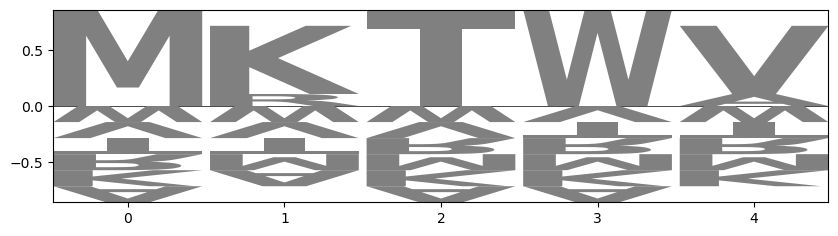

In [9]:
logomaker.Logo(pssm_df_transposed, center_values=True)

In [17]:
logomaker.alignment_to_matrix(aligned_sequences)

,A,K,M,R,T,V,W
pos,,,,,,,
0,0,0,4,0,0,0,0
1,0,3,0,1,0,0,0
2,0,0,0,0,4,0,0
3,0,0,0,0,0,0,4
4,1,0,0,0,0,3,0


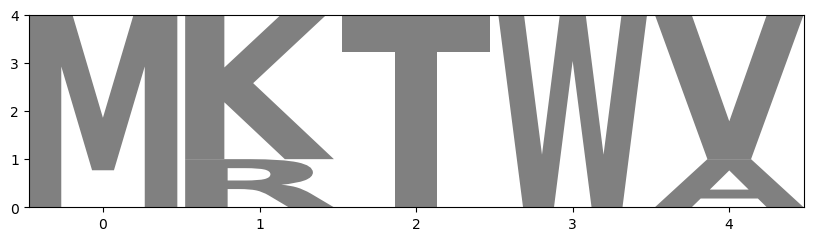

In [16]:
# load ss probability matrix
ss_df = logomaker.alignment_to_matrix(aligned_sequences)
logomaker.Logo(ss_df)

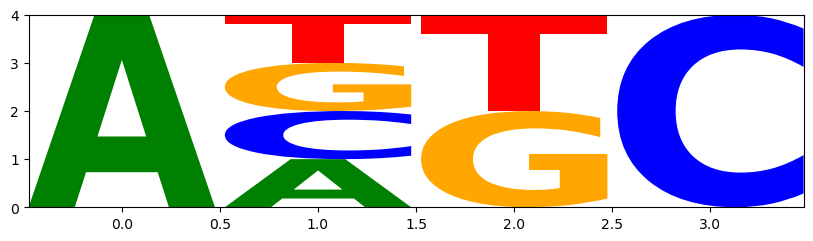

In [12]:

# Define the sequences
sequences = [
    "ATGC",
    "AGTC",
    "AATC",
    "ACGC"
]

# Convert sequences to a pandas DataFrame
df = logomaker.alignment_to_matrix(sequences)

# Create a Logo object
logomaker.Logo(df)



In [22]:
len(sequences)

4

In [28]:
seq_full = sequences_df[["Sequence_full"]]
seq_full = seq_full.values.flatten().tolist()

In [30]:
len(seq_full)

1363

In [31]:
ss_df = logomaker.alignment_to_matrix(seq_full)
logomaker.Logo(ss_df)

LogomakerError: all elements of sequences must have the same length.

In [ ]:

# # Define functions to process protein sequence
# def encode_sequence(sequence):
#   # Replace this with your sequence encoding logic (e.g., one-hot encoding)
#   # This example uses a simple dictionary for demonstration
#   aa_map = {"A": 0, "C": 1, "D": 2, "...": 25}  # Add entries for all amino acids
#   encoded_seq = [aa_map.get(aa, -1) for aa in sequence]
#   return encoded_seq

# def predict_nls_probability(model, protein_sequence):
#   # Encode the protein sequence
#   encoded_seq = encode_sequence(protein_sequence)
#   # Reshape the data for model prediction (might be specific to your model)
#   encoded_seq = np.reshape(encoded_seq, (1, -1))  # Reshape to a single sample
#   # Predict probability using the loaded model
#   probability = model.predict_proba(encoded_seq)[0][1]
#   return probability

# # Load the pre-trained NLS prediction model (replace with your model filename)
# model_filename = "nls_prediction_model.sav"
# model = joblib.load(model_filename)

# # Example usage
# protein_sequence = "MEEEEEKRKV"  # Replace with your actual protein sequence
# probability = predict_nls_probability(model, protein_sequence)

# print(f"Probability of NLS for protein: {probability}")


In [33]:
# perform PCA 
n_comp = 2
pca = PCA(n_components=n_comp)

# Fit the PCA model to the data matrix
pca.fit(pssm_df_transposed)

# Get the transformed data (component scores)
component_scores = pca.transform(pssm_df_transposed)

# Print the component scores
print(component_scores)

[[ 8.02652163e-18  8.16496581e-01]
 [-1.30751356e-16 -2.38675765e-16]
 [ 7.07106781e-01 -4.08248290e-01]
 [-7.07106781e-01 -4.08248290e-01]
 [ 1.45924103e-16 -2.85513299e-16]]


In [34]:
pca.explained_variance_ratio_

array([0.29411765, 0.29411765])